In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files
from IPython.display import Image
import cv2
from sklearn.model_selection import train_test_split
from google.colab import drive

import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization,Input
from keras.layers import Conv2D, MaxPool2D,Dropout, Dense, Input, concatenate,GlobalAveragePooling2D, AveragePooling2D,Flatten,GlobalMaxPool2D
from keras.utils import np_utils
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from PIL import Image
from keras.preprocessing import image

import tensorflow as tf

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
Data_1=pd.read_csv('/content/drive/MyDrive/Verisetleri/yeni_veri')

In [ ]:
Data_1.head()

,Unnamed: 0,age,ethnicity,gender,pixels
0,0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [ ]:
Data_1=Data_1.drop('Unnamed: 0',axis=1)

In [ ]:
Data_1.shape

(23705, 4)

In [ ]:
Data_1.head()

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [ ]:
#eğitim örneklerinin piksel değerleri bize tablo halinde yan yana verildiği için boşluklardan parse ederek liste olarak değişkene aldık
x_Data1 = Data_1.pixels.str.split(" ").tolist() 

x_Data1 = pd.DataFrame(x_Data1, dtype=int)
x_Data1 = x_Data1.values
x_Data1 = x_Data1.astype(np.float)

print(x_Data1)

print(x_Data1.shape)

[[129. 128. 128. ... 146. 146. 146.]
 [164.  74. 111. ... 182. 170. 148.]
 [ 67.  70.  71. ... 112. 111. 108.]
 ...
 [ 59.  50.  37. ...  98.  78.  78.]
 [ 45. 108. 120. ...  32.  35.  35.]
 [156. 161. 160. ... 190. 184. 174.]]
(23705, 2304)


In [ ]:
x_Data1=x_Data1.reshape(-1, 48, 48, 1)

In [ ]:
x_Data1.shape

(23705, 48, 48, 1)

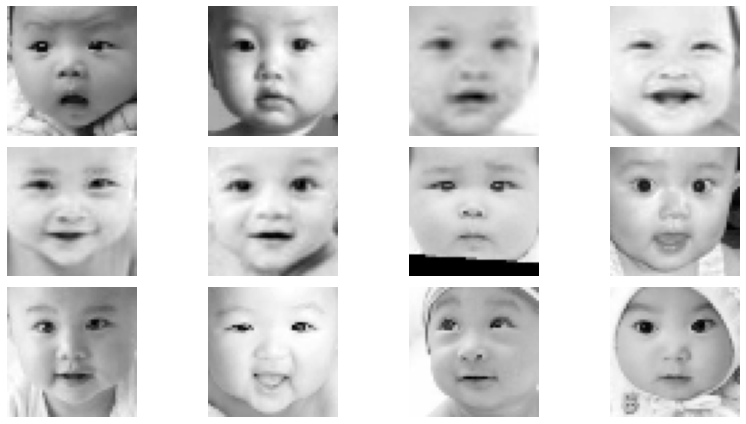

In [ ]:
plt.figure(0, figsize=(12,6))
for i in range(1,13):
  plt.subplot(3, 4, i)
  plt.axis('off')

  image = x_Data1[i].reshape(48,48)
  plt.imshow(image, cmap='gray')

plt.tight_layout()
plt.show()

In [ ]:
y_Data1=pd.DataFrame(Data_1, columns= ['age','gender'])

In [ ]:
y_Data1.head()

,age,gender
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
Data2_x=np.load('/content/drive/MyDrive/Verisetleri/X_data_48x48x1.npy')
Data2_y=pd.read_csv('/content/drive/My Drive/Verisetleri/yeni_veri_Y')

In [ ]:
Data2_x.shape
Data2_y.shape

(23695, 4)

,age,gender,ethnicity
0,100,0,0
1,100,0,0
2,100,1,0
3,100,1,0
4,100,1,0


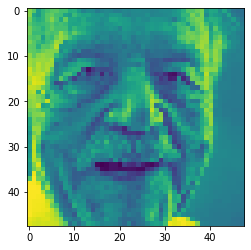

In [ ]:
plt.imshow(Data2_x[0])
Data2_y=Data2_y.drop('Unnamed: 0',axis=1)
Data2_y.columns =['age', 'gender', 'ethnicity']
Data2_y.head()

In [ ]:
Data2_y=pd.DataFrame(Data2_y, columns= ['age','gender'])

In [ ]:
Data2_y=np.array(Data2_y)
y_Data1=np.array(y_Data1)

In [ ]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x_Data1, y_Data1, test_size=0.20, random_state=50)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(Data2_x, Data2_y, test_size=0.20, random_state=50)

In [ ]:
print(X_train1.shape)
print(X_train2.shape)
print(X_test1.shape)
print(X_test2.shape)

(18964, 48, 48, 1)
(18956, 48, 48, 3)
(4741, 48, 48, 1)
(4739, 48, 48, 3)


In [ ]:
print(Y_train1.shape)
print(Y_train2.shape)
print(Y_test1.shape)
print(Y_test2.shape)

(18964, 3)
(18956, 3)
(4741, 3)
(4739, 3)


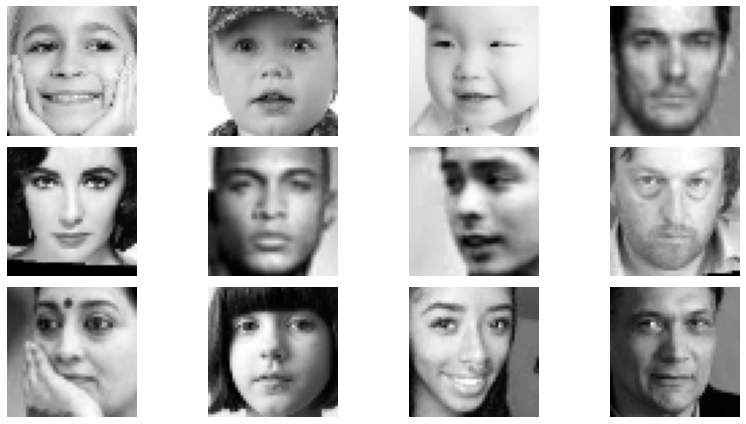

In [ ]:
plt.figure(0, figsize=(12,6))
for i in range(1,13):
  plt.subplot(3, 4, i)
  plt.axis('off')

  image = X_train1[i].reshape(48,48)
  plt.imshow(image, cmap='gray')

plt.tight_layout()
plt.show()

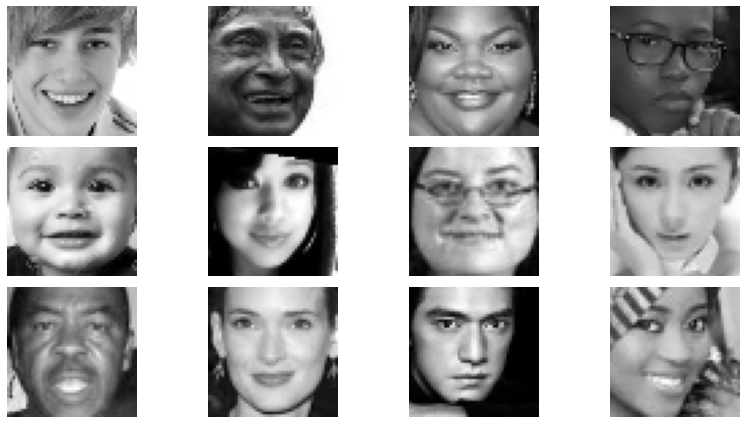

In [ ]:
plt.figure(0, figsize=(12,6))
for i in range(1,13):
  plt.subplot(3, 4, i)
  plt.axis('off')

  image = X_test1[i].reshape(48,48)
  plt.imshow(image, cmap='gray')

plt.tight_layout()
plt.show()

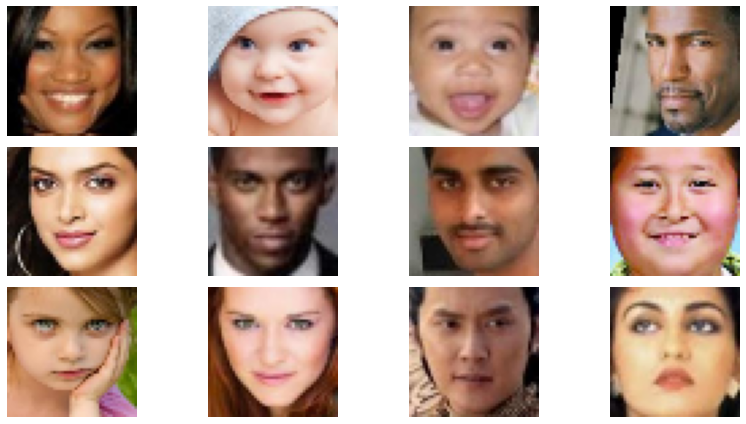

In [ ]:
plt.figure(0, figsize=(12,6))
for i in range(1,13):
  plt.subplot(3, 4, i)
  plt.axis('off')

  plt.imshow(X_train2[i])

plt.tight_layout()
plt.show()

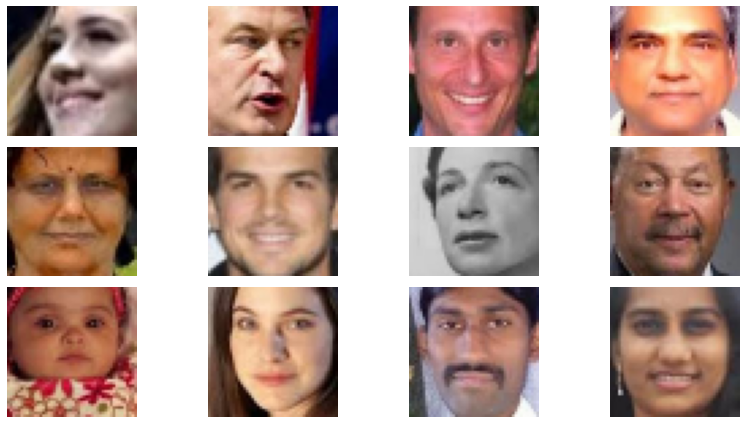

In [ ]:
plt.figure(0, figsize=(12,6))
for i in range(1,13):
  plt.subplot(3, 4, i)
  plt.axis('off')

  plt.imshow(X_test2[i])

plt.tight_layout()
plt.show()

In [ ]:
Y_train1.head()

,age,ethnicity,gender
1990,16,0,1
1265,10,0,1
15409,4,0,0
156,1,2,0
7572,26,0,0


In [ ]:
Y_train2.head()

,age,gender,ethnicity
23162,8,0,0
12349,33,1,1
1600,1,0,0
2663,1,1,4
16691,45,0,1


In [ ]:
Y_test1.head()

,age,ethnicity,gender
21173,64,2,0
1971,16,0,0
21378,65,3,0
10874,30,1,1
2151,16,1,0


In [ ]:
Y_test2.head()

,age,gender,ethnicity
12250,33,0,0
5777,26,0,0
18283,51,0,0
17126,47,0,0
19341,55,0,3


In [ ]:
Y_train1=[Y_train1[:,1],Y_train1[:,0]]
Y_test1=[Y_test1[:,1],Y_test1[:,0]]

In [ ]:
Y_train2=[Y_train2[:,1],Y_train2[:,0]]
Y_test2=[Y_test2[:,1],Y_test2[:,0]]

çıkış resim boyutu=((n+2p-f)/s)+1
p=(f-1)/2

In [ ]:
input_layer = Input(shape=(48, 48, 1))

x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu')(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)




conv_1x1 = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(96, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(128, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(16, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(32, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(32, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)






conv_1x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(128, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(192, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(32, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(96, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(64, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)


x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)



conv_1x1 = Conv2D(192, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(96, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(208, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(16, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(48, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(64, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)






conv_1x1 = Conv2D(160, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(112, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(224, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(24, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(64, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(64, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)



conv_1x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(128, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(256, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(24, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(64, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(64, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)


conv_1x1 = Conv2D(112, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(144, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(288, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(32, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(64, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(64, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)







conv_1x1 = Conv2D(256, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(160, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(320, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(32, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(128, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(128, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)

x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)


conv_1x1 = Conv2D(256, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(160, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(320, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(32, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(128, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(128, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)


conv_1x1 = Conv2D(384, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(192, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(384, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(48, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(128, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(128, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)
x = Dropout(0.05)(x)



bottleneck = GlobalMaxPool2D()(x)

x = Flatten()(bottleneck)
x1 =Dense(128,activation='relu')(bottleneck)
x2 = Dense(128,activation='relu')(bottleneck)
x1 = Dense(1,activation='sigmoid',name='sex_out')(x1)
x2 = Dense(1,activation='relu',name='age_out')(x2)

In [ ]:
#model = Sequential()

#1. KATMAN
#model.add(Conv2D(32, 3, input_shape=(32,32,1),activation='relu'))
#model.add(Conv2D(32, 3,activation='relu'))
#model.add(BatchNormalization())
#model.add(Activation('relu'))

#model.add(MaxPool2D(pool_size=(1,1),strides=2))
#model.add(Dropout(0.20))

#model.add(Conv2D(64, 3,activation='relu'))
#model.add(Conv2D(64,3,activation='relu'))
#model.add(BatchNormalization())
#model.add(Activation('relu'))

#model.add(MaxPool2D(pool_size=(1,1),strides=2))
#model.add(Dropout(0.2))


#model.add(Conv2D(84, 3,activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))

#model.add(Dense(32))


#model.add(Conv2D(168, (3,3),strides=1))
#model.add(Conv2D(192, (3,3),strides=1))
#model.add(BatchNormalization())
#model.add(Dense(32))
#model.add(Activation('relu'))

#model.add(MaxPool2D(pool_size=(3,3),strides=2))
#model.add(Dropout(0.2))

#model.add(Conv2D(216, (3,3),strides=1))
#model.add(BatchNormalization())
#model.add(Dense(32))
#model.add(Activation('relu'))


### TAM BAĞLANTI KATMANI
#model.add(Flatten())
#model.add(Dense(64))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(Dropout(0.1))

### Çıkış katmanı

#model.add(Dense(2))
#model.add(Activation('softmax')) 

#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #opmizasyon ve başarım hesaplama metriklerinin belirlenmesi
#model özetini görselleştirelim

#model.summary()

In [ ]:
model = Model(inputs=input_layer, outputs=[x1,x2])
model.compile(optimizer='Adam', loss=['binary_crossentropy','mae'])

In [ ]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_781 (Conv2D)             (None, 24, 24, 64)   3200        input_17[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_181 (MaxPooling2D (None, 12, 12, 64)   0           conv2d_781[0][0]                 
__________________________________________________________________________________________________
conv2d_782 (Conv2D)             (None, 12, 12, 64)   4160        max_pooling2d_181[0][0]          
___________________________________________________________________________________________

In [ ]:
epochs =75
batchSize =256

# modeli çalıştır
callbacks = [ModelCheckpoint("./model_checkpoint",monitor='val_loss')]
history = model.fit(X_train1, Y_train1, epochs=epochs,batch_size=batchSize,validation_data=(X_test1,Y_test1),callbacks=callbacks)

Epoch 1/75
75/75 [==============================] - 9s 82ms/step - loss: 24.4667 - sex_out_loss: 1.2179 - age_out_loss: 23.2488 - val_loss: 17.2443 - val_sex_out_loss: 0.7110 - val_age_out_loss: 16.5333
INFO:tensorflow:Assets written to: ./model_checkpoint/assets
Epoch 2/75
75/75 [==============================] - 6s 74ms/step - loss: 15.8362 - sex_out_loss: 0.6994 - age_out_loss: 15.1367 - val_loss: 18.1281 - val_sex_out_loss: 0.6754 - val_age_out_loss: 17.4527
INFO:tensorflow:Assets written to: ./model_checkpoint/assets
Epoch 3/75
75/75 [==============================] - 6s 75ms/step - loss: 13.6026 - sex_out_loss: 0.6918 - age_out_loss: 12.9108 - val_loss: 12.4107 - val_sex_out_loss: 0.6727 - val_age_out_loss: 11.7380
INFO:tensorflow:Assets written to: ./model_checkpoint/assets
Epoch 4/75
75/75 [==============================] - 6s 74ms/step - loss: 11.3736 - sex_out_loss: 0.6691 - age_out_loss: 10.7045 - val_loss: 10.0708 - val_sex_out_loss: 0.6831 - val_age_out_loss: 9.3877
INFO:t

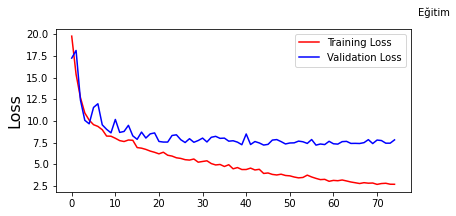

In [ ]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Eğitim', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color ='r', label='Training Loss')
plt.plot(history.history['val_loss'], color ='b', label='Validation Loss')
plt.legend(loc='upper right')




plt.show()

In [ ]:
epochs =75
batchSize =256

# modeli çalıştır
callbacks = [ModelCheckpoint("./model_checkpoint",monitor='val_loss')]
history = model.fit(X_train2, Y_train2, epochs=epochs,batch_size=batchSize,validation_data=(X_test2,Y_test2),callbacks=callbacks)

Epoch 1/75
75/75 [==============================] - 8s 83ms/step - loss: 3.8564 - sex_out_loss: 0.2365 - age_out_loss: 3.6199 - val_loss: 3.7038 - val_sex_out_loss: 0.2177 - val_age_out_loss: 3.4861
INFO:tensorflow:Assets written to: ./model_checkpoint/assets
Epoch 2/75
75/75 [==============================] - 6s 76ms/step - loss: 3.6625 - sex_out_loss: 0.2301 - age_out_loss: 3.4324 - val_loss: 4.2898 - val_sex_out_loss: 0.2160 - val_age_out_loss: 4.0738
INFO:tensorflow:Assets written to: ./model_checkpoint/assets
Epoch 3/75
75/75 [==============================] - 6s 77ms/step - loss: 3.7178 - sex_out_loss: 0.2251 - age_out_loss: 3.4927 - val_loss: 6.4558 - val_sex_out_loss: 0.2558 - val_age_out_loss: 6.1999
INFO:tensorflow:Assets written to: ./model_checkpoint/assets
Epoch 4/75
75/75 [==============================] - 6s 76ms/step - loss: 4.3989 - sex_out_loss: 0.2543 - age_out_loss: 4.1446 - val_loss: 4.6245 - val_sex_out_loss: 0.2605 - val_age_out_loss: 4.3640
INFO:tensorflow:Asset

KeyboardInterrupt: ignored

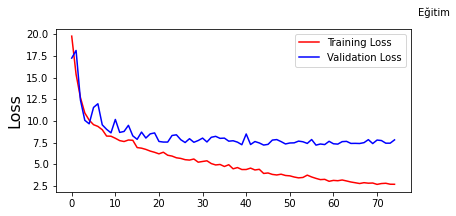

In [ ]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Eğitim', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color ='r', label='Training Loss')
plt.plot(history.history['val_loss'], color ='b', label='Validation Loss')
plt.legend(loc='upper right')


plt.show()

In [ ]:
#image_path = "/content/drive/MyDrive/Pro.jpg"
#image_path = "/content/drive/MyDrive/Proje 2 Denemeleri/Screenshot_20200515-185322.jpg"
#image_path = "/content/drive/MyDrive/Proje 2 Denemeleri/Screenshot_20201120-193333.jpg"
image_path = "/content/drive/MyDrive/Proje 2 Denemeleri/foto-krasivai.jpg"

#test_image_original = image.load_img(image_path) # orjinal renkli görüntü
#test_image = image.load_img(image_path, target_size=(48,48), grayscale=True)
#test_data = image.img_to_array(test_image)

#test_data = np.expand_dims(test_data, axis=0)
#test_data = np.vstack([test_data])


test_image_original=cv2.imread(image_path)
test_image_original=cv2.cvtColor(test_image_original,cv2.COLOR_BGR2GRAY)
test_image_original=cv2.resize(test_image_original,(48,48))
test_image_original=np.array(test_image_original)
test_image_original=test_image_original.reshape(-1,48,48,1)



sonuc=model.predict(test_image_original,batch_size=1)
print(sonuc)

[array([[0.96935105]], dtype=float32), array([[25.490871]], dtype=float32)]


In [ ]:
model.save("/content/drive/MyDrive/Model_48x48x1____.h5")